In [1]:
import numpy as np
import matplotlib.pyplot as plt

dataset =['hdb-resale-flat-prices/resale-flat-prices-based-on-approval-date-1990-1999.csv', 
          'hdb-resale-flat-prices/resale-flat-prices-based-on-approval-date-2000-feb-2012.csv', 
          'hdb-resale-flat-prices/resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv', 
          'hdb-resale-flat-prices/resale-flat-prices-based-on-registration-date-from-jan-2015-onwards.csv']

# read in all dataset & combined into one (named: consolidated_db)
for num, fname in enumerate(dataset):
    print('Reading from {}'.format(fname))
    data= np.genfromtxt(fname,skip_header=1,dtype=[('year_month','U10'),
                                                   ('town','U30'),
                                                   ('flat_type','U10'),
                                                   ('block','U6'),
                                                   ('street_name','U40'),
                                                   ('storey_range','U20'),
                                                   ('floor_area','i4'),
                                                   ('flat_model','U15'),
                                                   ('lease_commence_date','i8'),
                                                   ('resale_price','i8')],delimiter=",")
    if num == 0: consolidated_db = data
    else: consolidated_db = np.concatenate((consolidated_db,data))
print('Total Number of Records {}'.format(len(consolidated_db)))

#  Extract Unique Keys from Database
Town_List = np.unique(consolidated_db['town'])
Flat_Type_List = np.unique(consolidated_db['flat_type'])
Flat_Type_List = Flat_Type_List[:][0:-2] #get rid of Multi_Gen Type of Flats
Storey_Range_List = np.unique(consolidated_db['storey_range'])
Year_List = np.arange(1990,2019,1).astype('str')

# Functions to extract Boolean Index of Consolidated Database... 

def by_year(year):
    year_mth = np.char.split(consolidated_db['year_month'],sep='-')
    bool_idx = np.empty(len(consolidated_db)).astype('bool')                     
    for i in np.arange(len(consolidated_db)): 
        bool_idx[i] = ((year_mth[i][0][0:4] == year))
    return bool_idx
def by_town(town):
    bool_idx = (consolidated_db['town']==town)                 
    return bool_idx
def by_flat_type(flat_type):
    bool_idx = (consolidated_db['flat_type']==flat_type)                 
    return bool_idx
def by_storey_range(storey_range):
    bool_idx = (consolidated_db['storey_range']==storey_range)
    return bool_idx
def by_year_mth(year_mth):
    bool_idx = (consolidated_db['year_month']==year_mth)
    return bool_idx


Reading from hdb-resale-flat-prices/resale-flat-prices-based-on-approval-date-1990-1999.csv
Reading from hdb-resale-flat-prices/resale-flat-prices-based-on-approval-date-2000-feb-2012.csv
Reading from hdb-resale-flat-prices/resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv
Reading from hdb-resale-flat-prices/resale-flat-prices-based-on-registration-date-from-jan-2015-onwards.csv
Total Number of Records 785798


In [2]:
# National Mean, Median Price w.r.t Room type

price_mean=np.zeros(len(Year_List)).astype(int)
price_median=np.zeros(len(Year_List)).astype(int)

Price_Mean_List = []
Price_Median_List = []

for num, flat_type in enumerate(Flat_Type_List):    
    for num1, year in enumerate(Year_List):
        bool_idx = np.logical_and(by_year(year),by_flat_type(flat_type))
#        bool_idx = np.logical_and(bool_idx,by_flat_type(flat_type))
        db_extracted = (consolidated_db[bool_idx])
        price = db_extracted['resale_price']
#        print(year,np.mean(price),np.median(price),np.std(price))
        price_mean[num1] = np.mean(price)
        price_median[num1] = np.median(price)
    Price_Mean_List.append(list(price_mean))
    Price_Median_List.append(list(price_median))

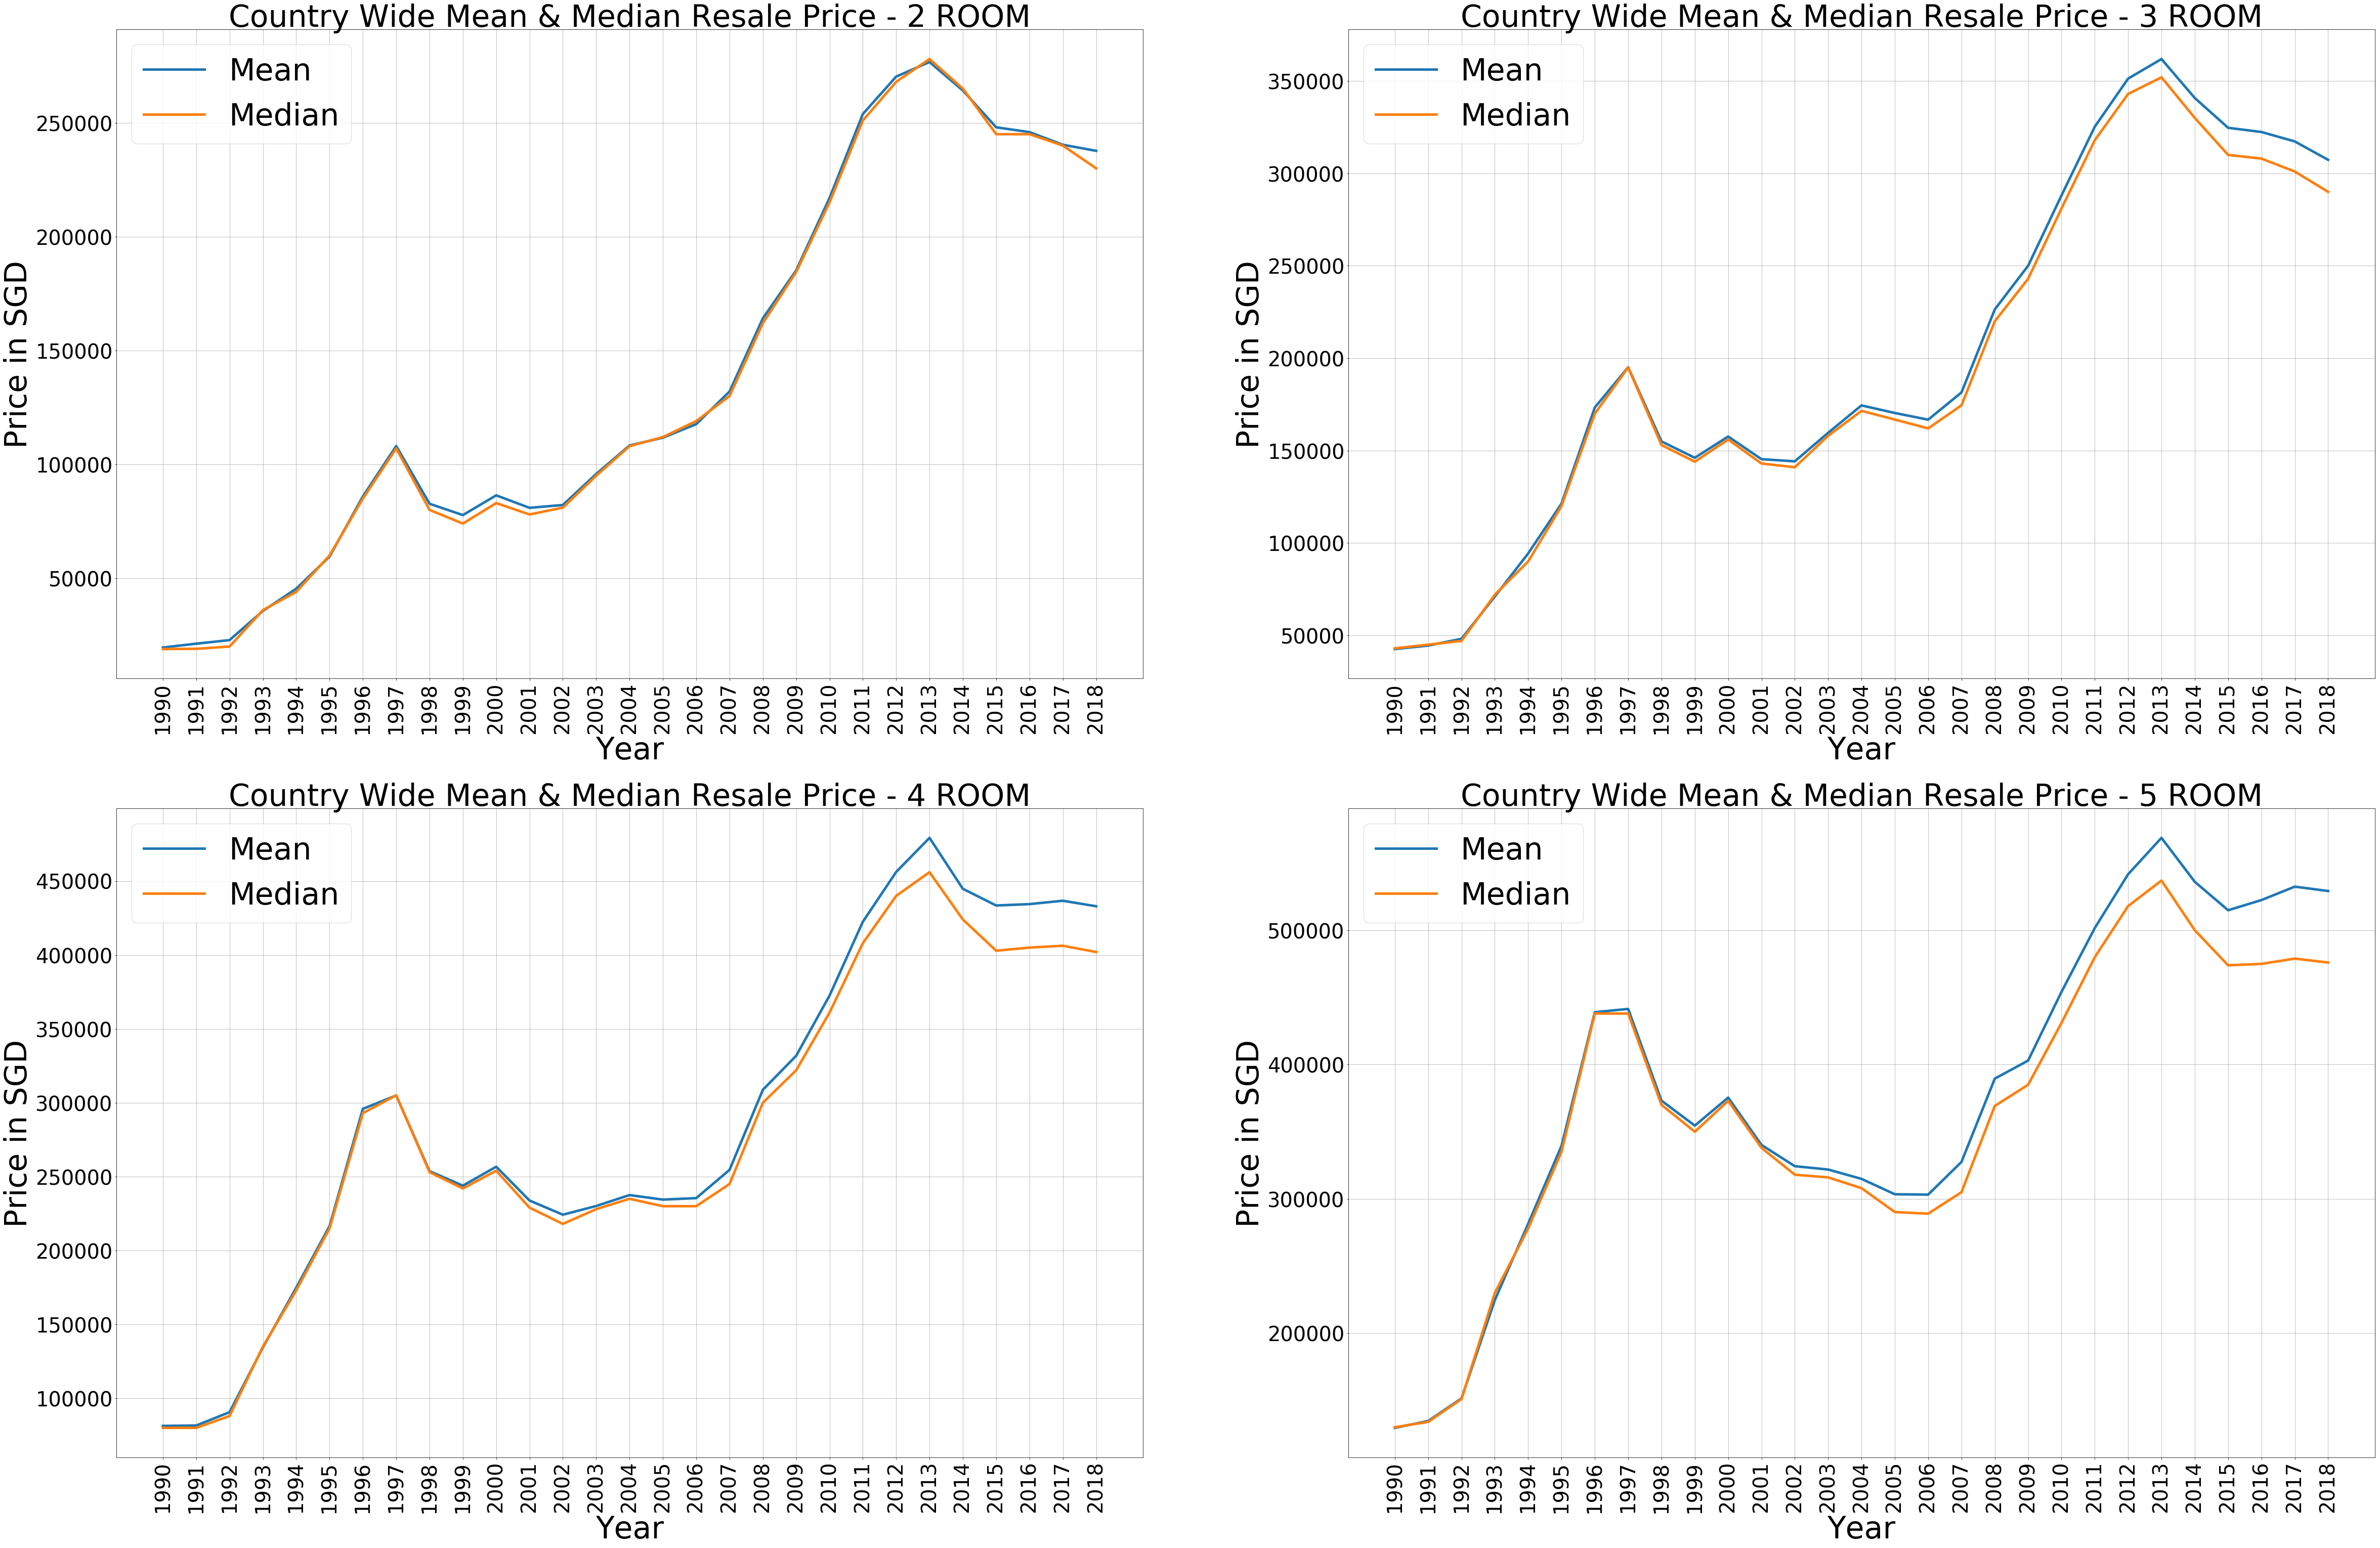

In [3]:
fig = plt.subplots(2,2,figsize=(80,40),sharex=True)
plt.subplots_adjust(left=None,bottom=-0.1)
for num in np.arange(len(Flat_Type_List)-2):
#     print(num+1,Flat_Type_List[num+1])
    plt.subplot(2,2,num+1)
    plt.plot(Year_List,Price_Mean_List[num+1][:], linewidth = 5 )
    plt.plot(Year_List,Price_Median_List[num+1][:], linewidth = 5)
    plt.xticks(Year_List, fontsize='40',rotation = 90)
    plt.yticks(fontsize='40')
    plt.xlabel("Year", fontsize='60')
    plt.ylabel("Price in SGD", fontsize='60')
    plt.legend(('Mean','Median'),fontsize='60')
    plt.title('Country Wide Mean & Median Resale Price - '+ Flat_Type_List[num+1], fontsize='60')
    plt.grid()



In [4]:
Flat_Type_List = np.unique(consolidated_db['flat_type'])
print(Flat_Type_List)
Flat_Type_List = Flat_Type_List[:][0:-2]
print(Flat_Type_List)

['1 ROOM' '2 ROOM' '3 ROOM' '4 ROOM' '5 ROOM' 'EXECUTIVE' 'MULTI GENE'
 'MULTI-GENE']
['1 ROOM' '2 ROOM' '3 ROOM' '4 ROOM' '5 ROOM' 'EXECUTIVE']


In [5]:
bool_idx = np.logical_and(by_year('2015'),by_town('ANG MO KIO'))
bool_idx = np.logical_and(bool_idx,by_flat_type('3 ROOM'))
db_extracted = consolidated_db[bool_idx]
for record in db_extracted:
    print(record)

('2015-01', 'ANG MO KIO', '3 ROOM', '174', 'ANG MO KIO AVE 4', '07 TO 09', 60, 'Improved', 1986, 255000)
('2015-01', 'ANG MO KIO', '3 ROOM', '541', 'ANG MO KIO AVE 10', '01 TO 03', 68, 'New Generation', 1981, 275000)
('2015-01', 'ANG MO KIO', '3 ROOM', '163', 'ANG MO KIO AVE 4', '01 TO 03', 69, 'New Generation', 1980, 285000)
('2015-01', 'ANG MO KIO', '3 ROOM', '446', 'ANG MO KIO AVE 10', '01 TO 03', 68, 'New Generation', 1979, 290000)
('2015-01', 'ANG MO KIO', '3 ROOM', '557', 'ANG MO KIO AVE 10', '07 TO 09', 68, 'New Generation', 1980, 290000)
('2015-01', 'ANG MO KIO', '3 ROOM', '603', 'ANG MO KIO AVE 5', '07 TO 09', 67, 'New Generation', 1980, 290000)
('2015-01', 'ANG MO KIO', '3 ROOM', '709', 'ANG MO KIO AVE 8', '01 TO 03', 68, 'New Generation', 1980, 290000)
('2015-01', 'ANG MO KIO', '3 ROOM', '333', 'ANG MO KIO AVE 1', '01 TO 03', 68, 'New Generation', 1981, 293000)
('2015-01', 'ANG MO KIO', '3 ROOM', '109', 'ANG MO KIO AVE 4', '01 TO 03', 67, 'New Generation', 1978, 300000)
('20

In [6]:
db_by_year = consolidated_db[by_year('1990')]
db_by_flat_type = consolidated_db[by_flat_type('3 ROOM')]
db_by_storey_range = consolidated_db[by_storey_range('04 TO 06')]
print(len(db_by_year))
print(len(db_by_flat_type))
print(len(db_by_storey_range))

12612
262515
200071


In [7]:
## combine boolean Indices to Extract Files
import numpy as np

bool_idx = np.logical_and(by_year('2018'),by_town('ANG MO KIO'))
bool_idx = np.logical_and(bool_idx,by_flat_type('3 ROOM'))
extracted_db = consolidated_db[bool_idx]
print(len(extracted_db))


472


In [ ]:
## combine boolean Indices to Extract Files
import numpy as np
import requests 
import math

bool_idx = np.logical_and(by_year('2018'),by_town('ANG MO KIO'))
bool_idx = np.logical_and(bool_idx,by_flat_type('5 ROOM'))
extracted_db = consolidated_db[bool_idx]

# Get List of MRT Station

MRT_Stn = np.genfromtxt('data/MRT_Stations.csv',skip_header=1, 
                        dtype=[('Station_Name','U30'),
                               ('Latitude','float64'),
                               ('Longitude','float64')],delimiter=",")


#  Get Longitude & Latitude Information from OneMAP from address field

lat1 = 1.369947993  # Lat, Lon of AMK Station
lon1 = 103.849616

def latlon_dist(origin, destination):
#   example print(latlon_dist((lat1,lon1),(lat2,lon2)))    
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 # km

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c
    return d  # distance in km

url1 = 'https://developers.onemap.sg/commonapi/search?searchVal='
url3 = '&returnGeom=Y&getAddrDetails=N&pageNum=1'

price = []
dist =[]
for num,record in enumerate(extracted_db):
    address = record['block'] + ' ' + record['street_name']
    URL = url1 + address + url3 # sending get request and saving the response as response object 
    r = requests.get(url = URL) # extracting data in json format 
    data = r.json()
    for result in data['results']:
        lat2 = float(result['LATITUDE'])
        lon2 = float(result['LONGITUDE'])
    price.append(record['resale_price'])
    dist.append(latlon_dist((lat1,lon1),(lat2,lon2))*1000)


In [ ]:
price = np.array(price)

#
#  regression line

p = np.polyfit(dist, price*0.001, deg=1)
y = p[1] + p[0] * np.array(dist)
fig1,ax1 = plt.subplots(figsize=(40,30))
plt.scatter(dist,price*0.001,s=200)
plt.plot(dist,y, color='r',linewidth=4)
plt.xlabel('Distance from Ang Mo Kio MRT Station',fontsize=48)
plt.ylabel("Resale Pricein SGD ('000s')",fontsize=48)
plt.title("Scatter Plot of Resale 5-ROOM flat in AMK & Simple Regression",fontsize=60)
plt.legend(('Regression of Price vs Distance from MRT','Resale Price of 5-ROOM flat in 2018'),fontsize = 48)
plt.xticks(fontsize=48)
plt.yticks(fontsize=48)
plt.grid()
plt.show()